In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Read the data from csv
df = pd.read_csv('air_quality_streamed.csv')
df.head()

,Consumer_Timestamp,Producer_timestamp,Date,Time,Datetime,Record Index,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2025-04-04T15:26:44.422846,2025-04-04T14:45:33.903819,10/03/2004,18.00.00,2004-03-10T18:00:00,0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2025-04-04T15:26:44.423620,2025-04-04T14:45:33.969644,10/03/2004,19.00.00,2004-03-10T19:00:00,1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2025-04-04T15:26:44.424104,2025-04-04T14:45:33.971183,10/03/2004,20.00.00,2004-03-10T20:00:00,2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2025-04-04T15:26:44.424936,2025-04-04T14:45:33.972456,10/03/2004,21.00.00,2004-03-10T21:00:00,3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2025-04-04T15:26:44.425309,2025-04-04T14:45:33.973231,10/03/2004,22.00.00,2004-03-10T22:00:00,4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df.describe()

,Record Index,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,4678.000000,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,2701.277568,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.000000,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,2339.000000,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,4678.000000,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,7017.000000,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,9356.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Consumer_Timestamp  9357 non-null   object 
 1   Producer_timestamp  9357 non-null   object 
 2   Date                9357 non-null   object 
 3   Time                9357 non-null   object 
 4   Datetime            9357 non-null   object 
 5   Record Index        9357 non-null   int64  
 6   CO(GT)              7674 non-null   float64
 7   PT08.S1(CO)         8991 non-null   float64
 8   NMHC(GT)            914 non-null    float64
 9   C6H6(GT)            8991 non-null   float64
 10  PT08.S2(NMHC)       8991 non-null   float64
 11  NOx(GT)             7718 non-null   float64
 12  PT08.S3(NOx)        8991 non-null   float64
 13  NO2(GT)             7715 non-null   float64
 14  PT08.S4(NO2)        8991 non-null   float64
 15  PT08.S5(O3)         8991 non-null   float64
 16  T     

# 1. Data Preparation and Cleansing

## Formatting the Columnns

In [ ]:
# Convert the 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consumer_Timestamp  9357 non-null   object        
 1   Producer_timestamp  9357 non-null   object        
 2   Date                9357 non-null   object        
 3   Time                9357 non-null   object        
 4   Datetime            9357 non-null   datetime64[ns]
 5   Record Index        9357 non-null   int64         
 6   CO(GT)              7674 non-null   float64       
 7   PT08.S1(CO)         8991 non-null   float64       
 8   NMHC(GT)            914 non-null    float64       
 9   C6H6(GT)            8991 non-null   float64       
 10  PT08.S2(NMHC)       8991 non-null   float64       
 11  NOx(GT)             7718 non-null   float64       
 12  PT08.S3(NOx)        8991 non-null   float64       
 13  NO2(GT)             7715 non-null   float64     

In [ ]:
# Dropping Date and Time column as we already have datetime
# First check if 'Datetime' column exists and then check if 'Date' and 'Time'.
# If yes then delete it
if 'Datetime' in df.columns:
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])

    if 'Time' in df.columns:
        df = df.drop(columns=['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consumer_Timestamp  9357 non-null   object        
 1   Producer_timestamp  9357 non-null   object        
 2   Datetime            9357 non-null   datetime64[ns]
 3   Record Index        9357 non-null   int64         
 4   CO(GT)              7674 non-null   float64       
 5   PT08.S1(CO)         8991 non-null   float64       
 6   NMHC(GT)            914 non-null    float64       
 7   C6H6(GT)            8991 non-null   float64       
 8   PT08.S2(NMHC)       8991 non-null   float64       
 9   NOx(GT)             7718 non-null   float64       
 10  PT08.S3(NOx)        8991 non-null   float64       
 11  NO2(GT)             7715 non-null   float64       
 12  PT08.S4(NO2)        8991 non-null   float64       
 13  PT08.S5(O3)         8991 non-null   float64     

In [ ]:
# Sort by datetime and set it as the DataFrame index
# This is required as we are working with time series data
df.sort_values(by='Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

In [ ]:
# Create extra time-based columns for aggregation later
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.day_name()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Consumer_Timestamp  9357 non-null   object 
 1   Producer_timestamp  9357 non-null   object 
 2   Record Index        9357 non-null   int64  
 3   CO(GT)              7674 non-null   float64
 4   PT08.S1(CO)         8991 non-null   float64
 5   NMHC(GT)            914 non-null    float64
 6   C6H6(GT)            8991 non-null   float64
 7   PT08.S2(NMHC)       8991 non-null   float64
 8   NOx(GT)             7718 non-null   float64
 9   PT08.S3(NOx)        8991 non-null   float64
 10  NO2(GT)             7715 non-null   float64
 11  PT08.S4(NO2)        8991 non-null   float64
 12  PT08.S5(O3)         8991 non-null   float64
 13  T                   8991 non-null   float64
 14  RH                  8991 non-null   float64
 15  AH                 

,Consumer_Timestamp,Producer_timestamp,Record Index,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek
Datetime,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2025-04-04T15:26:44.422846,2025-04-04T14:45:33.903819,0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,Wednesday
2004-03-10 19:00:00,2025-04-04T15:26:44.423620,2025-04-04T14:45:33.969644,1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,Wednesday
2004-03-10 20:00:00,2025-04-04T15:26:44.424104,2025-04-04T14:45:33.971183,2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,Wednesday
2004-03-10 21:00:00,2025-04-04T15:26:44.424936,2025-04-04T14:45:33.972456,3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,Wednesday
2004-03-10 22:00:00,2025-04-04T15:26:44.425309,2025-04-04T14:45:33.973231,4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,Wednesday


# Handle missing values

In [ ]:
# Display the count of missing values in the columns
print("Missing values\n", df.isnull().sum())

Missing values
 Consumer_Timestamp       0
Producer_timestamp       0
Record Index             0
CO(GT)                1683
PT08.S1(CO)            366
NMHC(GT)              8443
C6H6(GT)               366
PT08.S2(NMHC)          366
NOx(GT)               1639
PT08.S3(NOx)           366
NO2(GT)               1642
PT08.S4(NO2)           366
PT08.S5(O3)            366
T                      366
RH                     366
AH                     366
Hour                     0
DayOfWeek                0
dtype: int64


In [ ]:
# Drop 'NMHC(GT)' if the missing rate is above 80%
if 'NMHC(GT)' in df.columns and df['NMHC(GT)'].isnull().mean() > 0.8:
    df.drop(columns=['NMHC(GT)'], inplace=True)
    print("Dropped 'NMHC(GT)' due to high missing rate.")

Dropped 'NMHC(GT)' due to high missing rate.


In [ ]:
# For the remaining columns, we use forward-fill because:
# The data is time series and we are assuming a gradual change.
# This method preserves the time-order continuity.
df_filled = df.ffill()

In [ ]:
# Verify missing values are handled
print("Missing values after handling:\n", df_filled.isnull().sum())

Missing values after handling:
 Consumer_Timestamp    0
Producer_timestamp    0
Record Index          0
CO(GT)                0
PT08.S1(CO)           0
C6H6(GT)              0
PT08.S2(NMHC)         0
NOx(GT)               0
PT08.S3(NOx)          0
NO2(GT)               0
PT08.S4(NO2)          0
PT08.S5(O3)           0
T                     0
RH                    0
AH                    0
Hour                  0
DayOfWeek             0
dtype: int64


# Basic Visualizations

## Time series plot for key pollutants

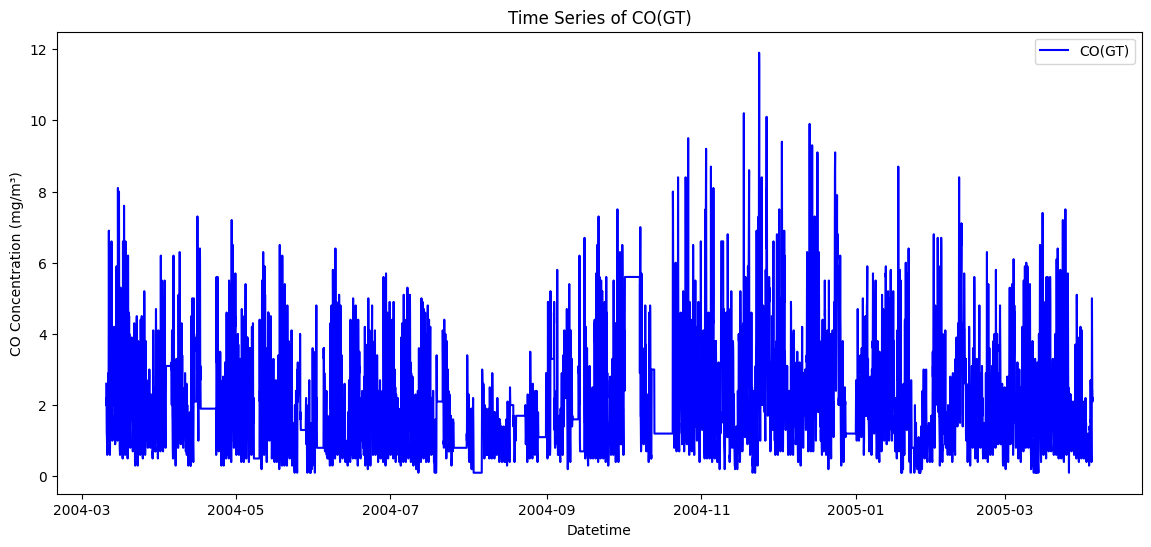

In [ ]:
# CO(GT)
plt.figure(figsize=(14, 6))
plt.plot(df_filled.index, df_filled['CO(GT)'], label='CO(GT)', color='blue')
plt.xlabel('Datetime')
plt.ylabel('CO Concentration (mg/m³)')
plt.title('Time Series of CO(GT)')
plt.legend()
plt.show()

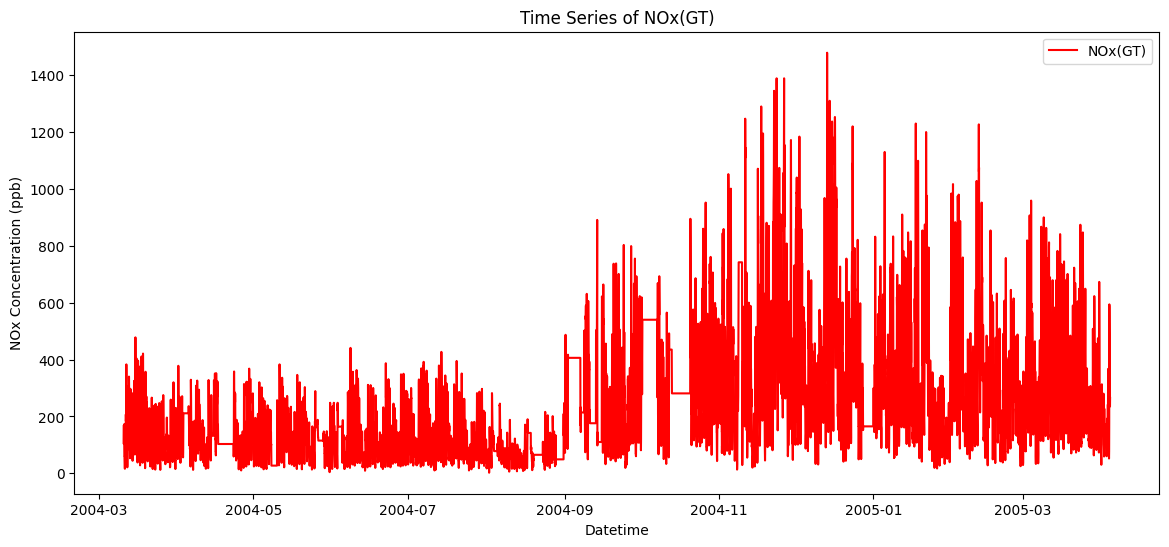

In [ ]:
# NOx(GT)
plt.figure(figsize=(14, 6))
plt.plot(df_filled.index, df_filled['NOx(GT)'], label='NOx(GT)', color='red')
plt.xlabel('Datetime')
plt.ylabel('NOx Concentration (ppb)')
plt.title('Time Series of NOx(GT)')
plt.legend()
plt.show()

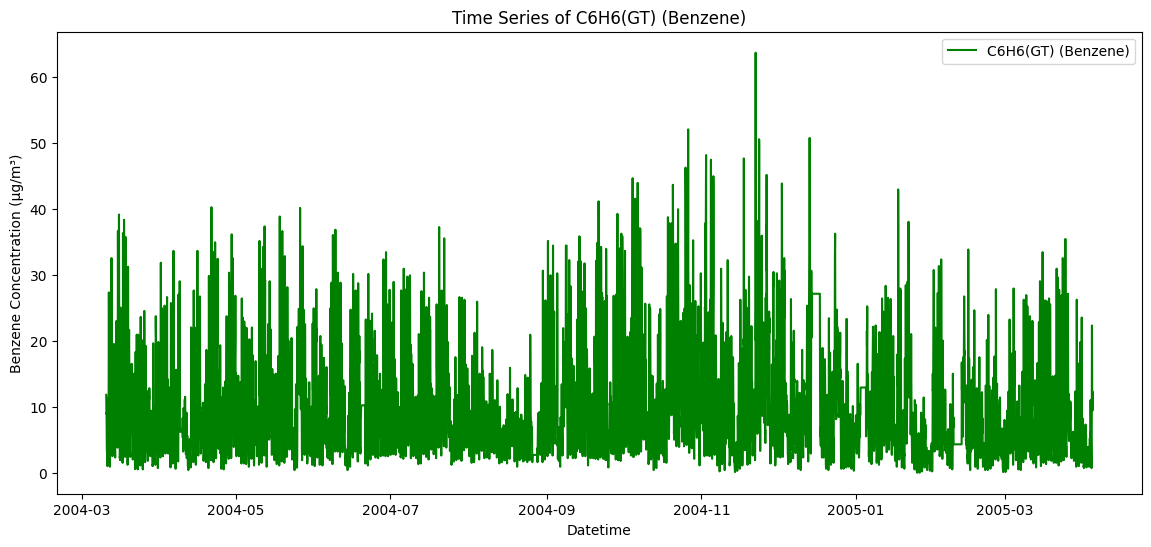

In [ ]:
# Benzene measured as C6H6(GT)
plt.figure(figsize=(14, 6))
plt.plot(df_filled.index, df_filled['C6H6(GT)'], label='C6H6(GT) (Benzene)', color='green')
plt.xlabel('Datetime')
plt.ylabel('Benzene Concentration (µg/m³)')
plt.title('Time Series of C6H6(GT) (Benzene)')
plt.legend()
plt.show()

## Daily and Hourly Patterns

### Hourly Pattern

In [ ]:
hourly_avg = df_filled.groupby('Hour').mean(numeric_only=True)

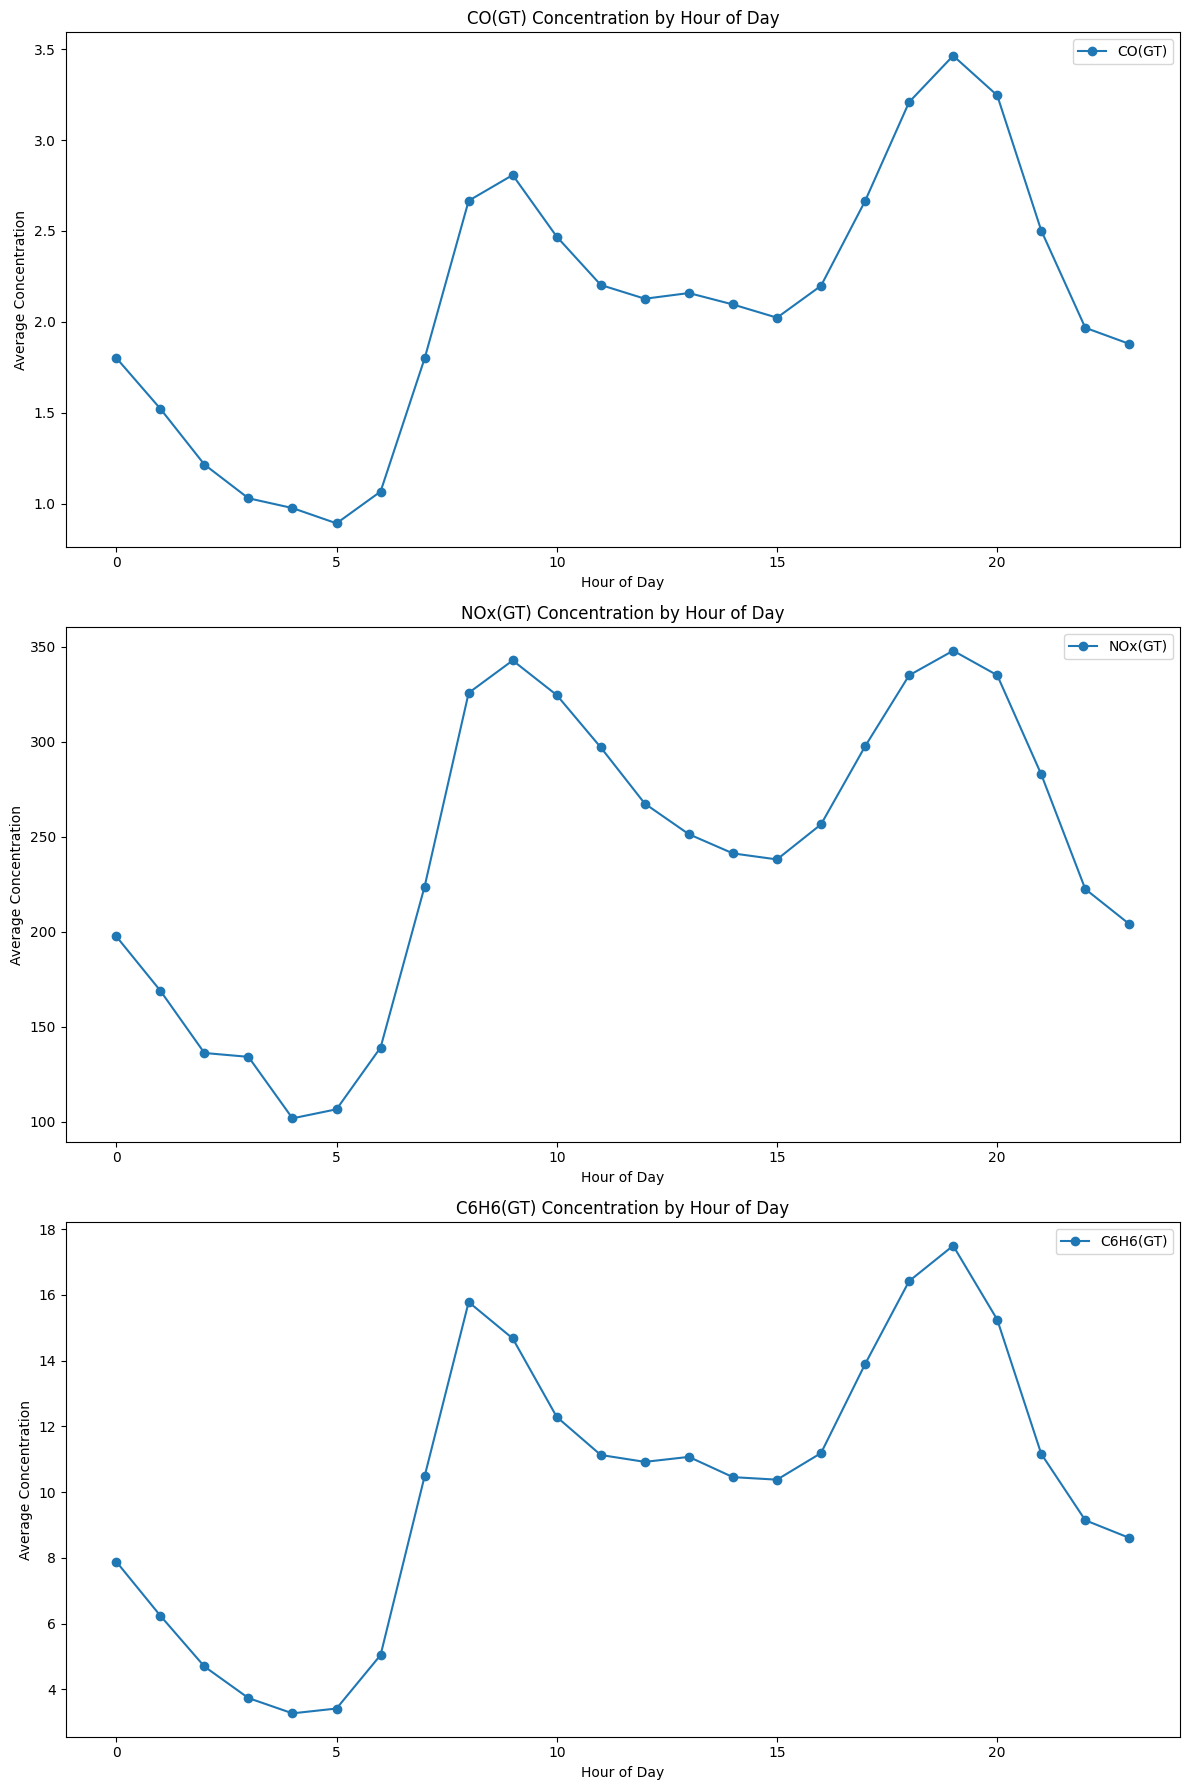

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for CO(GT)
axes[0].plot(hourly_avg.index, hourly_avg['CO(GT)'], marker='o', label='CO(GT)')
axes[0].set_title('CO(GT) Concentration by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Concentration')
axes[0].legend()

# Plot for NOx(GT)
axes[1].plot(hourly_avg.index, hourly_avg['NOx(GT)'], marker='o', label='NOx(GT)')
axes[1].set_title('NOx(GT) Concentration by Hour of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Concentration')
axes[1].legend()

# Plot for C6H6(GT)
axes[2].plot(hourly_avg.index, hourly_avg['C6H6(GT)'], marker='o', label='C6H6(GT)')
axes[2].set_title('C6H6(GT) Concentration by Hour of Day')
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('Average Concentration')
axes[2].legend()

plt.tight_layout()
plt.show()


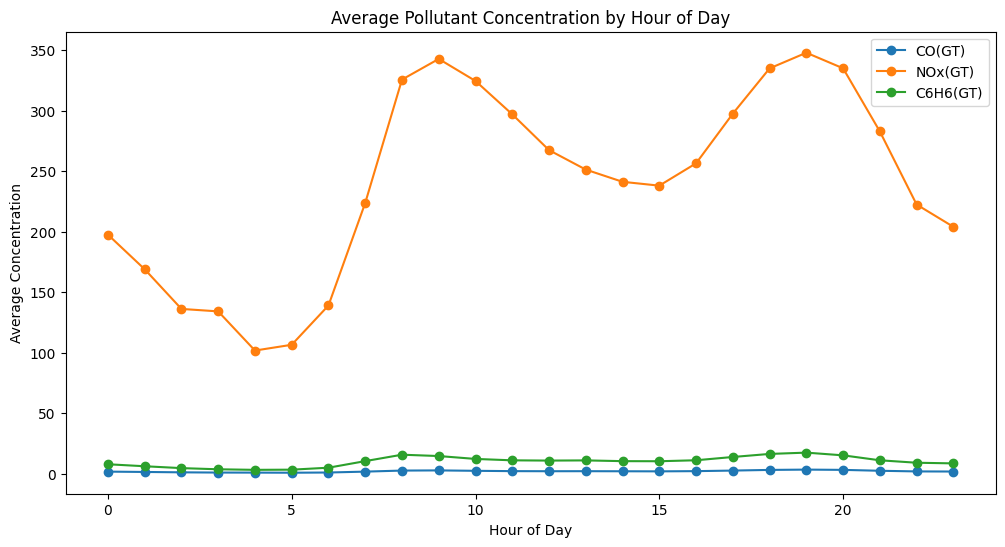

In [ ]:
# Combined graph to show average by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['CO(GT)'], marker='o', label='CO(GT)')
plt.plot(hourly_avg.index, hourly_avg['NOx(GT)'], marker='o', label='NOx(GT)')
plt.plot(hourly_avg.index, hourly_avg['C6H6(GT)'], marker='o', label='C6H6(GT)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.title('Average Pollutant Concentration by Hour of Day')
plt.legend()
plt.show()

### Weekly Pattern

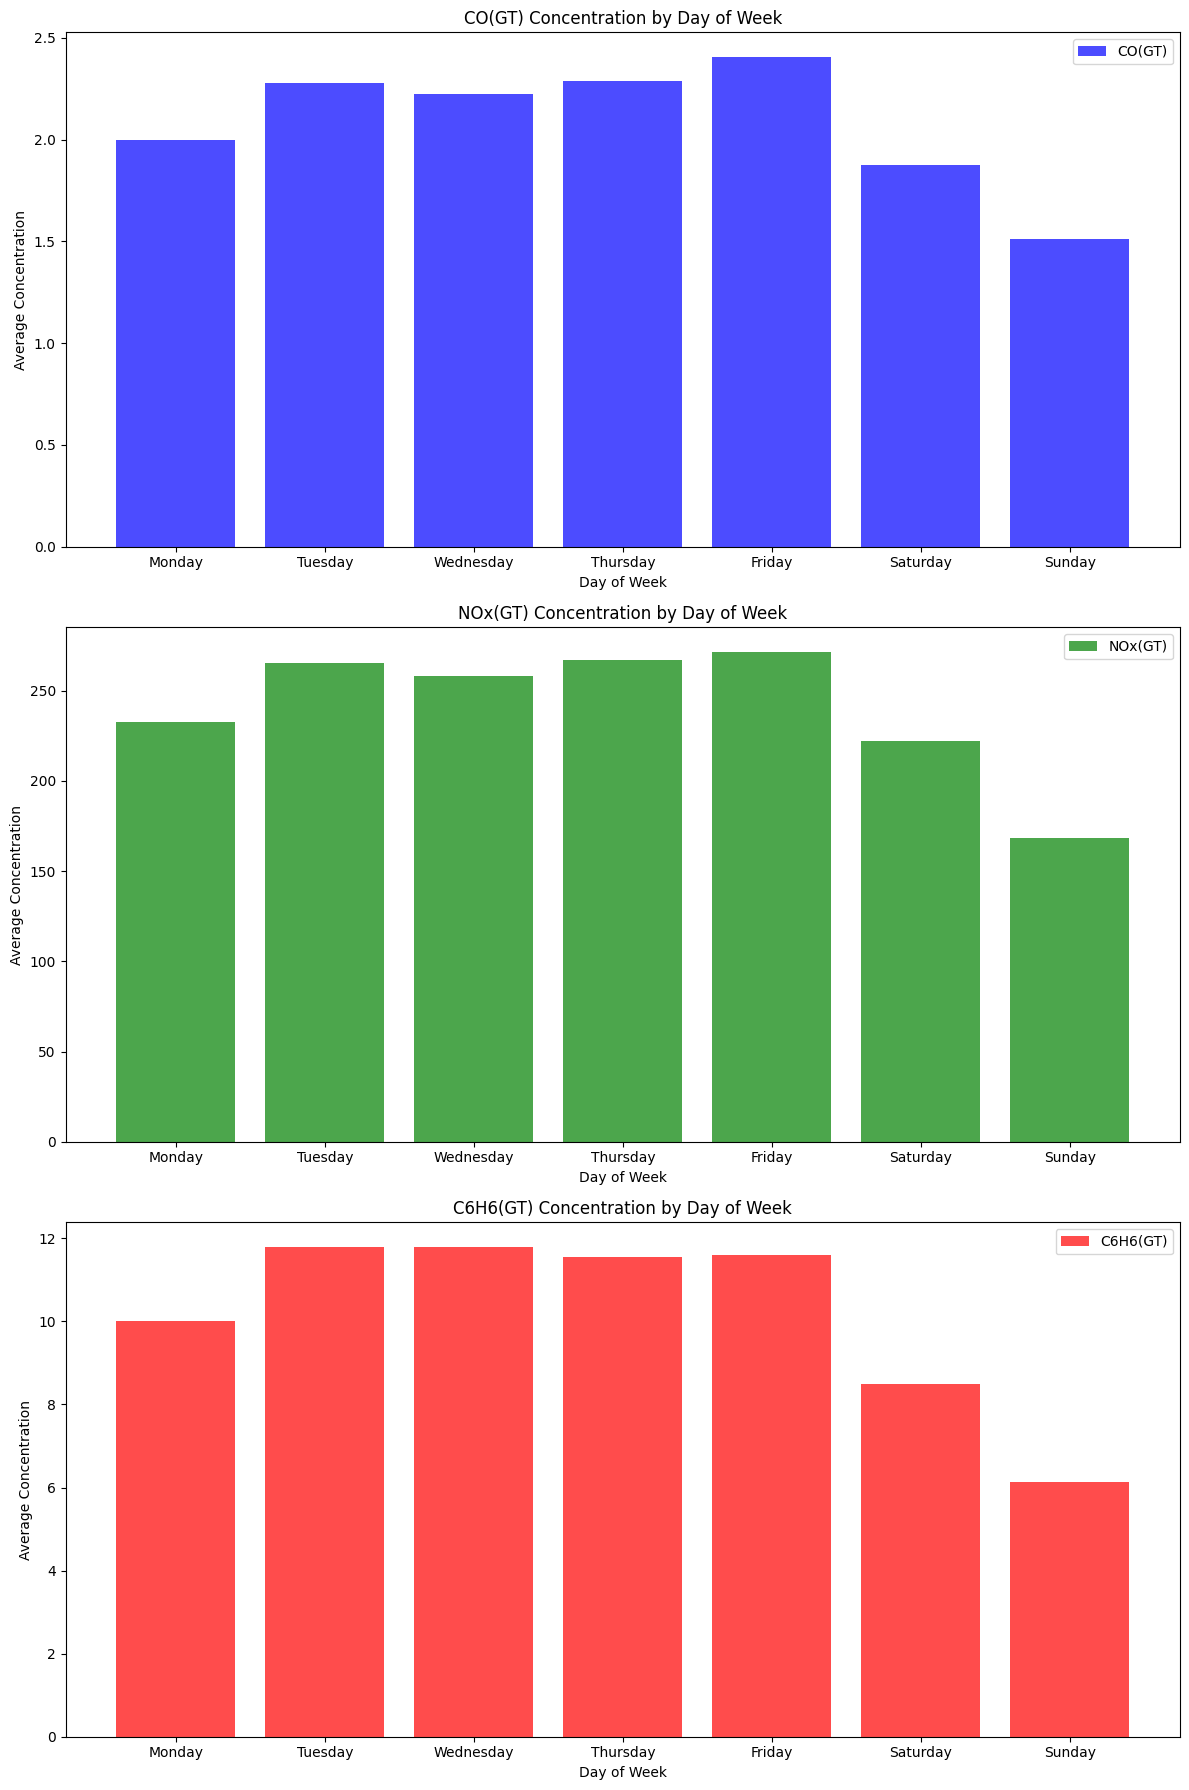

In [ ]:
# Average by day of week (order days from Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df_filled.groupby('DayOfWeek').mean(numeric_only=True).reindex(day_order)

# Create separate bar plots for each pollutant
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for CO(GT)
axes[0].bar(daily_avg.index, daily_avg['CO(GT)'], alpha=0.7, color='b', label='CO(GT)')
axes[0].set_title('CO(GT) Concentration by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Concentration')
axes[0].legend()

# Plot for NOx(GT)
axes[1].bar(daily_avg.index, daily_avg['NOx(GT)'], alpha=0.7, color='g', label='NOx(GT)')
axes[1].set_title('NOx(GT) Concentration by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Concentration')
axes[1].legend()

# Plot for C6H6(GT)
axes[2].bar(daily_avg.index, daily_avg['C6H6(GT)'], alpha=0.7, color='r', label='C6H6(GT)')
axes[2].set_title('C6H6(GT) Concentration by Day of Week')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Average Concentration')
axes[2].legend()

plt.tight_layout()
plt.show()



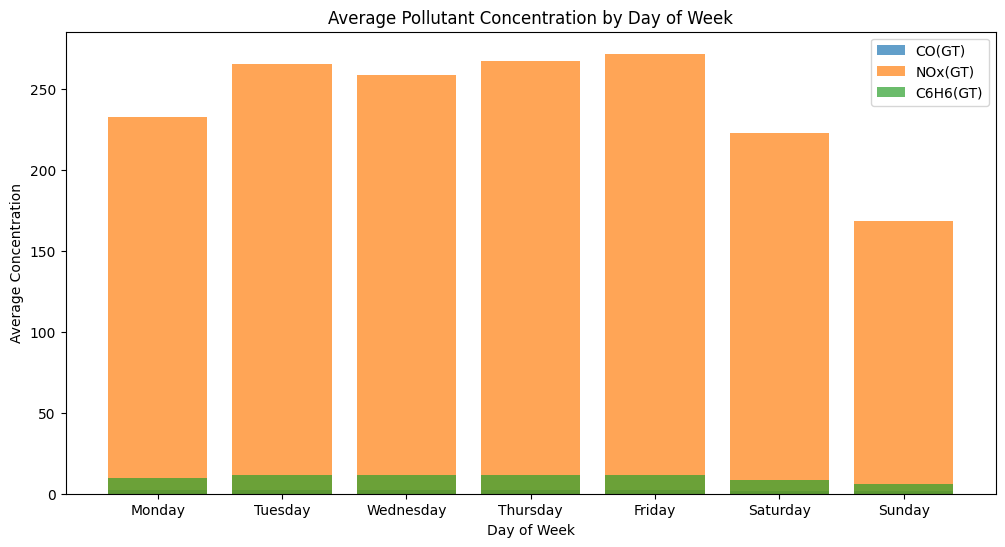

Average concentrations by day of week:
           Record Index    CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
DayOfWeek                                                                  
Monday      4702.303371  1.997453  1074.509363  10.004045     930.152060   
Tuesday     4673.500000  2.278030  1123.065152  11.796515     992.768182   
Wednesday   4676.255656  2.222097  1133.575415  11.781976     997.474359   
Thursday    4637.500000  2.287574  1140.395833  11.552009     990.386161   
Friday      4661.500000  2.406994  1140.872768  11.602158     995.036458   
Saturday    4685.500000  1.877679  1088.860863   8.502530     897.544643   
Sunday      4709.500000  1.510342  1018.420387   6.142262     796.025298   

              NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
DayOfWeek                                                                    
Monday     232.728839    854.703371  106.835955   1431.946816   994.002996   
Tuesday    265.232576    805.978030  113.7

In [ ]:
# Average by day of week (order days from Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df_filled.groupby('DayOfWeek').mean(numeric_only=True).reindex(day_order)
plt.figure(figsize=(12, 6))
plt.bar(daily_avg.index, daily_avg['CO(GT)'], alpha=0.7, label='CO(GT)')
plt.bar(daily_avg.index, daily_avg['NOx(GT)'], alpha=0.7, label='NOx(GT)')
plt.bar(daily_avg.index, daily_avg['C6H6(GT)'], alpha=0.7, label='C6H6(GT)')
plt.xlabel('Day of Week')
plt.ylabel('Average Concentration')
plt.title('Average Pollutant Concentration by Day of Week')
plt.legend()
plt.show()

print("Average concentrations by day of week:")
print(daily_avg)

## Correlation Map

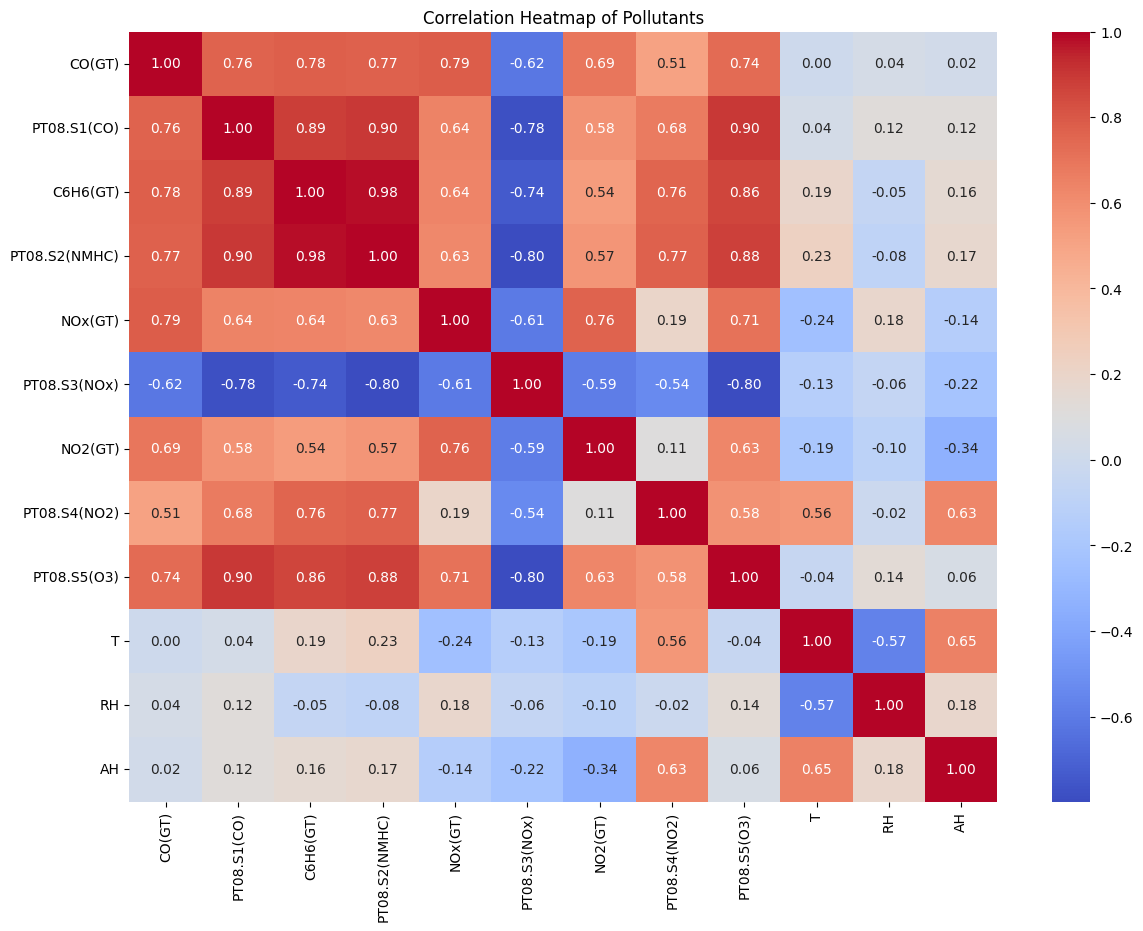

In [ ]:
pollutant_cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                  'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                  'PT08.S5(O3)', 'T', 'RH', 'AH']
existing_cols = [col for col in pollutant_cols if col in df_filled.columns]
corr_matrix = df_filled[existing_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants')
plt.show()


In [ ]:
# Remove Highly Collinear Features
def remove_high_correlation(df, threshold=0.9):
    """
    Remove columns that have a correlation above the given threshold i.e 0.9 with any other column.
    """
    corr_matrix = df.corr().abs()
    # Upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns with correlation above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Return DataFrame with dropped columns
    return df.drop(columns=to_drop), to_drop

In [ ]:
# We apply collinearity removal only to numeric columns and
# exclude the newly added Hour/DayOfWeek

numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
df_reduced, dropped_cols = remove_high_correlation(df_filled[numeric_cols], threshold=0.90)

In [ ]:
# Display dropped columns

print(f"\nDropped columns due to high correlation (> 0.9): {dropped_cols}")

# Merging the reduced numeric columns back with non-numeric columns (like 'DayOfWeek')
non_numeric_cols = df_filled.select_dtypes(exclude=[np.number]).columns
df_final = pd.concat([df_reduced, df_filled[non_numeric_cols]], axis=1)


Dropped columns due to high correlation (> 0.9): ['PT08.S2(NMHC)', 'PT08.S5(O3)']


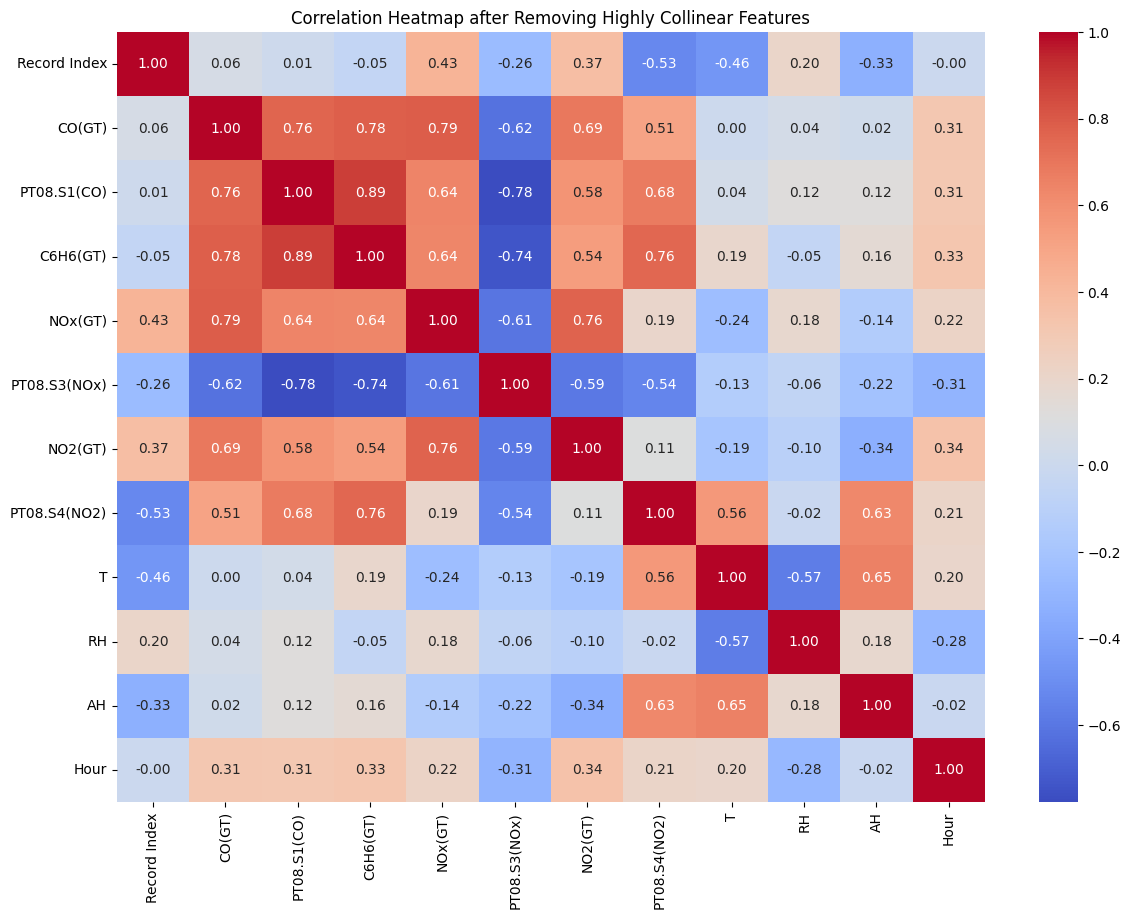

In [ ]:
# Display Heatmap After Dropping Columns
plt.figure(figsize=(14, 10))
sns.heatmap(df_reduced.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap after Removing Highly Collinear Features')
plt.show()

# Advanced Visualization

<Figure size 1200x400 with 0 Axes>

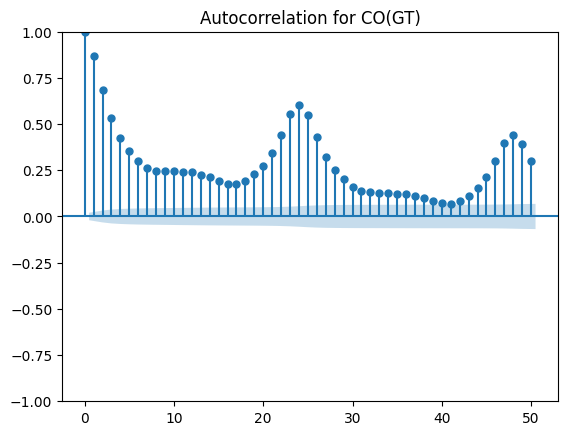

<Figure size 1200x400 with 0 Axes>

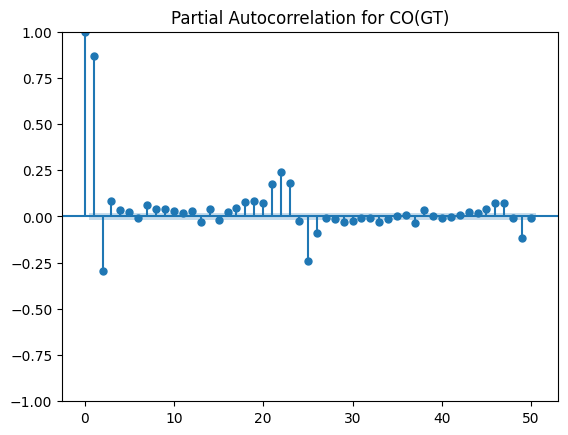

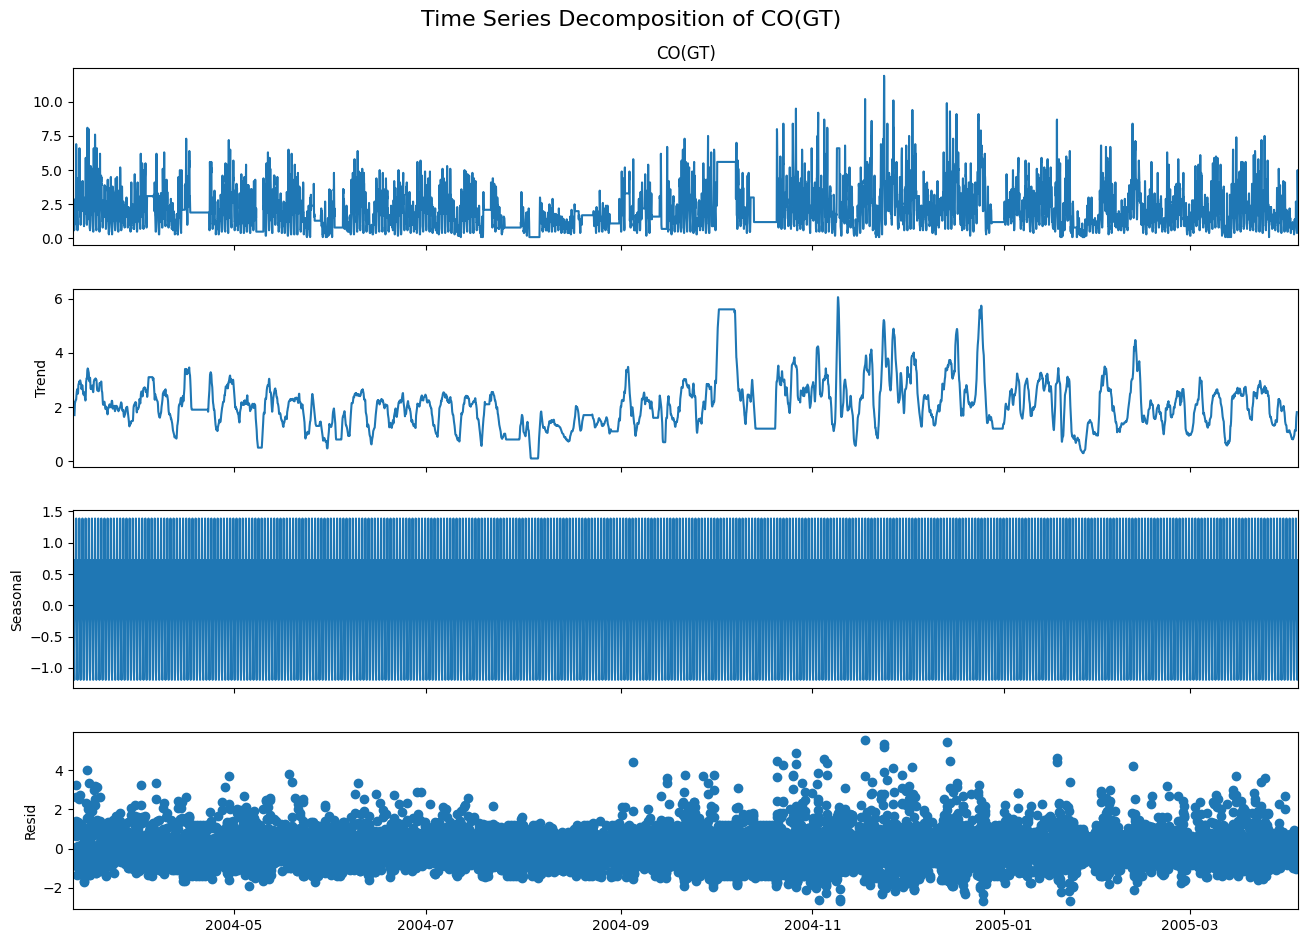

In [ ]:
plt.figure(figsize=(12, 4))
plot_acf(df_final['CO(GT)'].dropna(), lags=50)
plt.title('Autocorrelation for CO(GT)')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df_final['CO(GT)'].dropna(), lags=50)
plt.title('Partial Autocorrelation for CO(GT)')
plt.show()

try:
    decomposition = seasonal_decompose(df_final['CO(GT)'].dropna(), model='additive', period=24)
    fig = decomposition.plot()
    fig.set_size_inches(14, 10)
    plt.suptitle('Time Series Decomposition of CO(GT)', fontsize=16)
    plt.show()
except Exception as e:
    print("Error in time series decomposition:", e)


# Saving file to csv so that this cleansed data can be used for model prediction

In [ ]:
df_final.to_csv('air_quality_cleaned.csv')